<a href="https://colab.research.google.com/github/kakakafafafa888/Adipose_Ghost_Analysis/blob/main/03_Muscle_Flagship_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title ⚓️ 启动协议：自愈式环境初始化 (Run This First!)
import os
import sys
import warnings
import subprocess
from google.colab import drive

# ==========================================
# 1. 建立云端连接 (Mounting)
# ==========================================
if not os.path.exists('/content/drive'):
    print("🔌 正在连接 Google Drive...")
    drive.mount('/content/drive')
else:
    print("✅ Google Drive 已连接。")

# ==========================================
# 2. 锁定项目基地 (Navigation)
# ==========================================
PROJECT_ROOT = '/content/drive/MyDrive/Project_Adipose_Ghost'

if os.path.exists(PROJECT_ROOT):
    os.chdir(PROJECT_ROOT)
    print(f"📂 工作目录已切换至: {os.getcwd()}")
else:
    print(f"❌ 错误: 找不到路径 {PROJECT_ROOT}。请检查 Drive 结构。")

# ==========================================
# 3. 环境自检与自动安装 (Auto-Install)
# ==========================================
# 这里是关键！自动判断是否需要安装 scanpy
try:
    import scanpy as sc
    print("✅ Scanpy 环境已就绪。")
except ImportError:
    print("📦 检测到新环境，正在后台安装 Scanpy & Leidenalg (约需 1-2 分钟)...")
    # 使用 quiet 模式安装，不让刷屏的日志烦你
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scanpy", "leidenalg", "matplotlib==3.7.1", "--quiet"])
    print("🎉 安装完成！")
    import scanpy as sc

# ==========================================
# 4. 加载基础工具箱 (Imports)
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sc.settings.set_figure_params(dpi=100, frameon=False, vector_friendly=True, fontsize=12)
sc.settings.verbosity = 3
warnings.filterwarnings('ignore')

print("\n🚀 猎户座系统 V2.0 启动完毕。")

✅ Google Drive 已连接。
📂 工作目录已切换至: /content/drive/MyDrive/Project_Adipose_Ghost
✅ Scanpy 环境已就绪。

🚀 猎户座系统 V2.0 启动完毕。


In [ ]:
# @title 🔬 数字显微镜：查看文件真实面目（查看分隔符）
import gzip
import os

# 1. 确认文件路径 (请再次核对你的实际路径！)
# 如果你改过名，这里一定要对上
file_path = '/content/drive/MyDrive/Project_Adipose_Ghost/00_RawData/GSE138826_Muscle_CTX_TimeCourse/index.html?acc=GSE138826&format=file&file=GSE138826_expression_matrix.txt.gz'

print(f"🔎 正在检查文件: {os.path.basename(file_path)}")
print(f"   文件大小: {os.path.getsize(file_path) / (1024*1024):.2f} MB")

# 2. 尝试读取前 3 行
try:
    # 假设它是标准的 gzip
    with gzip.open(file_path, 'rt') as f:
        print("\n--- [GZIP 模式读取预览] ---")
        for i in range(3):
            line = f.readline()
            print(f"Line {i}: {line[:100]}...") # 只打前100个字符防止刷屏

            # 自动诊断分隔符
            if '\t' in line:
                print(f"   -> 检测到 TAB 分隔符 (Scanpy 应该能读，除非第一行坏了)")
            elif ',' in line:
                print(f"   -> ⚠️ 检测到 逗号(,) 分隔符！这是 CSV，不是 TXT！")
            elif ' ' in line:
                print(f"   -> ⚠️ 检测到 空格 分隔符！")
            else:
                print(f"   -> ❌ 未检测到常见分隔符，文件可能损坏或格式异常。")

except OSError:
    # 如果 gzip 打开失败，说明它可能已经被解压了但名字没改
    print("\n⚠️ GZIP 读取失败！尝试普通文本模式读取...")
    with open(file_path, 'r') as f:
        print("\n--- [普通文本模式读取预览] ---")
        for i in range(3):
            print(f"Line {i}: {f.readline()[:100]}...")

except Exception as e:
    print(f"\n❌ 读取发生未知错误: {e}")

In [ ]:
# @title 🚑 依赖地狱救援脚本 (numpy不兼容急救)
# ---------------------------------------------------------
# 这一步会自动检测 NumPy 版本。
# 如果是 2.x，它会强制降级并"自杀"重启，这是正常的！
# ---------------------------------------------------------

import sys
import os
import subprocess
import time

def check_and_fix_environment():
    try:
        import numpy as np
        current_ver = np.__version__
        print(f"🧐 当前 NumPy 版本: {current_ver}")

        # 如果是 2.x 版本，或者 scanpy 无法导入，则执行降级
        if current_ver.startswith('2'):
            print("⚠️ 检测到 NumPy 2.0+ (与 Scanpy 不兼容)。")
            print("💉 正在执行外科手术：强制降级 NumPy 和 Matplotlib...")

            # 1. 强制安装兼容版本
            # 我们同时指定 numpy<2 和 matplotlib 3.7.1 (避免 plotting 报错)
            subprocess.check_call([
                sys.executable, "-m", "pip", "install",
                "numpy<2.0",
                "pandas",
                "scanpy",
                "matplotlib==3.7.1", # 降级 matplotlib 以配合 scanpy 绘图
                "leidenalg",
                "--force-reinstall", "--quiet"
            ])

            print("✅ 安装完成。")
            print("💥 正在重启运行时以应用更改... (你会看到'会话崩溃'的提示，这是正常的)")
            time.sleep(1)

            # 2. 自杀式重启 (这一步是必须的！)
            # 这会强制 Colab 重新加载 C 语言扩展库
            os.kill(os.getpid(), 9)

        else:
            print("✅ NumPy 版本兼容 (1.x)。无需操作。")

    except ImportError:
        # 如果连 numpy 都没有，直接装
        subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy<2.0", "scanpy", "leidenalg", "--quiet"])
        os.kill(os.getpid(), 9)

# 执行检查
check_and_fix_environment()

# ========================================================
# 如果代码运行到这里没有崩，说明环境已经修复好了
# ========================================================
import numpy as np
import scanpy as sc
print(f"\n🎉 环境修复成功！")
print(f"   - NumPy Version: {np.__version__}")
print(f"   - Scanpy Version: {sc.__version__}")
print("   - 现在可以去跑你的数据读取代码了。")

In [ ]:
# @title 兼容版本核查
import numpy as np
import scanpy as sc

print(f"当前 NumPy 版本: {np.__version__}")
print(f"当前 Scanpy 版本: {sc.__version__}")

# 判决标准
if np.__version__.startswith('1'):
    print("✅ 恭喜！环境已降级为 1.x，Scanpy 可以正常工作了。")
    print("➡️ 下一步：立刻去跑读取数据的代码！")
else:
    print("❌ 失败：版本依然是 2.x。请重新运行上面的'依赖地狱救援脚本'。")

In [ ]:
# @title 🚜 新加载思路：修正文件名 + 空格符读取（内存警告）
import os
import pandas as pd
import scanpy as sc

# 1. 自动定位那个名字很奇怪的文件
# -------------------------------------------------------
base_dir = '/content/drive/MyDrive/Project_Adipose_Ghost/00_RawData/GSE138826_Muscle_CTX_TimeCourse'
# 这里的名字是你报错信息里显示的那个
weird_name = 'index.html?acc=GSE138826&format=file&file=GSE138826_expression_matrix.txt.gz'
correct_name = 'GSE138826_expression_matrix.txt.gz'

weird_path = os.path.join(base_dir, weird_name)
correct_path = os.path.join(base_dir, correct_name)

# 2. 强制正名 (File Renaming)
# -------------------------------------------------------
if os.path.exists(weird_path):
    print(f"🔧 检测到乱码文件名，正在修复为: {correct_name}")
    os.rename(weird_path, correct_path)
elif os.path.exists(correct_path):
    print("✅ 文件名已正确，无需修复。")
else:
    # 也就是两个名字都找不到，可能你已经手动改过了，或者路径不对
    # 这种情况下，我们假设它已经是 correct_name
    print(f"⚠️ 未找到乱码文件，尝试直接读取标准名文件...")

# 3. 坦克式读取 (Pandas Loading)
# -------------------------------------------------------
# 这里的 h5ad 路径用于存档，下次直接读这个，不要再读 txt 了
h5ad_save_path = '/content/drive/MyDrive/Project_Adipose_Ghost/01_Processing/GSE138826_Muscle_Raw.h5ad'

if os.path.exists(h5ad_save_path):
    print("🚀 发现已存在的 h5ad 存档，直接加载...")
    adata = sc.read_h5ad(h5ad_save_path)
else:
    print(f"📖 正在读取矩阵 (空格分隔模式)... 这需要 2-3 分钟...")
    try:
        # 关键参数：sep=' ' (指定空格), quotechar='"' (处理双引号)
        df = pd.read_csv(correct_path, sep=' ', quotechar='"', index_col=0)

        print(f"✅ 读取成功！矩阵形状: {df.shape}")
        print("   正在转置并转换为 AnnData...")

        # 你的显微镜显示：行是基因(Xkr4)，列是细胞(Noninjured_...)
        # Scanpy 需要 细胞 x 基因，所以必须转置 (.T)
        adata = sc.AnnData(df.T)

        print("💾 正在存档为 h5ad (以后秒读)...")
        os.makedirs(os.path.dirname(h5ad_save_path), exist_ok=True)
        adata.write(h5ad_save_path)
        print("✅ 存档完成。")

    except FileNotFoundError:
        print("❌ 致命错误：找不到文件，请确认文件名和路径！")
    except Exception as e:
        print(f"❌ 读取发生错误: {e}")

# 4. 展示最终成果
# -------------------------------------------------------
if 'adata' in locals():
    print(f"\n🎉 旗舰就位: {adata.n_obs} 细胞 x {adata.n_vars} 基因")
    print("   示例细胞名:", adata.obs_names[:2].tolist())

In [ ]:
# @title 📥 通用数据加载器 (内存警告)
import os
import scanpy as sc
import pandas as pd
# 定义路径 (Path Definitions)
import warnings
# 屏蔽所有 FutureWarning，眼不见为净
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
print("✅ 耳根清净了。")-
# 路径定义
txt_path = '/content/drive/MyDrive/Project_Adipose_Ghost/00_RawData/GSE138826_Muscle_CTX_TimeCourse/GSE138826_expression_matrix.txt.gz'
h5ad_save_path = '/content/drive/MyDrive/Project_Adipose_Ghost/01_Processing/GSE138826_Muscle_Raw.h5ad'
#启动 Pandas 引擎读取数据 (这比 Scanpy 慢一点，但更稳)
try:
    # 1. 使用 Pandas 读取
    # sep=None, engine='python' 让 Pandas 自动嗅探分隔符
    # index_col=0 把第一列作为行名(基因名)
    df = pd.read_csv(txt_path, sep=None, engine='python', index_col=0)

    print(f"✅ Pandas 读取成功！矩阵形状: {df.shape}")
    print("   (注意：如果是 基因x细胞，我们需要转置)")

    # 2. 转为 AnnData
    # 通常 TXT 是 Gene x Cell (行是基因，列是细胞)
    # Scanpy 要求 Cell x Gene
    adata = sc.AnnData(df.T)

    print(f"🔄 已转换为 AnnData: {adata.n_obs} 细胞 x {adata.n_vars} 基因")

    # 3. 存档 (下次就不用坦克压了)
    os.makedirs(os.path.dirname(h5ad_save_path), exist_ok=True)
    adata.write(h5ad_save_path)
    print(f"💾 已存档至: {h5ad_save_path}")

except Exception as e:
    print(f"❌ 坦克也挂了: {e}")

print(f"📊 当前数据状态: {adata.n_obs} 细胞 x {adata.n_vars} 基因")

In [ ]:
# @title 🛡️ 防爆内存加载方案：分块流式读取 (Chunked Loader)
# 专门针对 12GB 内存环境优化（免费也吃吐）
import pandas as pd
import scanpy as sc
import os
import gc # 垃圾回收器

# 1. 路径定义 (确保路径是对的！)
txt_path = '/content/drive/MyDrive/Project_Adipose_Ghost/00_RawData/GSE138826_Muscle_CTX_TimeCourse/GSE138826_expression_matrix.txt.gz'
h5ad_save_path = '/content/drive/MyDrive/Project_Adipose_Ghost/01_Processing/GSE138826_Muscle_Raw.h5ad'

print(f"🛡️ 启动分块加载模式，目标: {os.path.basename(txt_path)}")
print("   内存策略: 每次读取 2000 个基因，用完即弃")

try:
    # 2. 初始化分块阅读器
    # chunksize=2000: 极低内存占用
    reader = pd.read_csv(txt_path, sep=' ', quotechar='"', index_col=0, chunksize=2000)

    adatas = []
    chunk_count = 0

    print("   正在流水线作业 (请盯着左上角的 RAM 使用率，它应该很稳)...")

    for chunk in reader:
        chunk_count += 1
        # 实时转置：(Gene x Cell) -> (Cell x Gene)
        # 将 Pandas DataFrame 转换为稀疏矩阵存储的 AnnData，大幅省内存
        adata_chunk = sc.AnnData(chunk.T)
        adatas.append(adata_chunk)

        # 显式删除中间变量，强制回收内存
        del chunk

        if chunk_count % 10 == 0:
            print(f"   -> 已处理第 {chunk_count} 块...")
            gc.collect() # 强制释放内存

    print(f"✅ 所有分块读取完毕 (共 {chunk_count} 块)。正在组装...")

    # 3. 最终组装
    # 这一步内存会短暂升高，但因为已经是 AnnData 对象，通常扛得住
    final_adata = sc.concat(adatas, axis=1)

    # 补全索引名
    final_adata.obs_names = adatas[0].obs_names
    final_adata.var_names_make_unique()

    print(f"🎉 组装成功！旗舰就位: {final_adata.n_obs} 细胞 x {final_adata.n_vars} 基因")

    # 4. 存档 (这是最重要的！存下来我们就赢了)
    print("💾 正在写入 Google Drive (h5ad)...")
    os.makedirs(os.path.dirname(h5ad_save_path), exist_ok=True)
    final_adata.write(h5ad_save_path, compression='gzip') # 使用压缩进一步省空间
    print(f"✅ 存档完成: {h5ad_save_path}")
    print("   (现在哪怕 Colab 爆炸，你的数据也安全了)")

except Exception as e:
    print(f"❌ 加载失败: {e}")

In [ ]:
# @title 🔍 验毒：确认文件头格式
import gzip

file_path = '/content/drive/MyDrive/Project_Adipose_Ghost/00_RawData/GSE138826_Muscle_CTX_TimeCourse/GSE138826_expression_matrix.txt.gz'

print(f"🧐 正在检查文件头: {file_path}")
try:
    with gzip.open(file_path, 'rt') as f:
        # 读取第一行（细胞名）
        header = f.readline().strip()
        # 读取第二行（第一个基因）
        first_row = f.readline().strip()

        print("\n--- [Head Preview] ---")
        print(f"Header (前50字符): {header[:50]}...")
        print(f"Row 1  (前50字符): {first_row[:50]}...")

        if "<!DOCTYPE html>" in header or "<html" in header:
            print("\n❌ 警报：这依然是个网页文件！请重新运行之前的‘紧急修复’代码下载！")
        elif " " in first_row and '"' in first_row:
            print("\n✅ 确认：格式正常 (空格分隔 + 双引号)。可以执行稀疏化加载。")
        else:
            print("\n⚠️ 警告：格式看起来有点怪，但我们将尝试强制读取。")

except Exception as e:
    print(f"❌ 文件读取错误: {e}")

🧐 正在检查文件头: /content/drive/MyDrive/Project_Adipose_Ghost/00_RawData/GSE138826_Muscle_CTX_TimeCourse/GSE138826_expression_matrix.txt.gz

--- [Head Preview] ---
Header (前50字符): "Noninjured_AAACCCAAGTGCTCAT" "Noninjured_AAACCCAA...
Row 1  (前50字符): "Xkr4" 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...

✅ 确认：格式正常 (空格分隔 + 双引号)。可以执行稀疏化加载。


In [ ]:
# @title 🛡️ 究极省内存方案：稀疏化流式加载器（8G适配）
import pandas as pd
import scanpy as sc
import os
import gc
from scipy import sparse

# 1. 路径配置
txt_path = '/content/drive/MyDrive/Project_Adipose_Ghost/00_RawData/GSE138826_Muscle_CTX_TimeCourse/GSE138826_expression_matrix.txt.gz'
h5ad_save_path = '/content/drive/MyDrive/Project_Adipose_Ghost/01_Processing/GSE138826_Muscle_Raw.h5ad'

# 2. 参数设置
chunk_size = 1000 # 进一步减小块大小，由 2000 降为 1000，以此换取稳定性
print(f"🛡️ 启动稀疏化加载模式，Chunk Size: {chunk_size}")

try:
    # 初始化读取器
    reader = pd.read_csv(txt_path, sep=' ', quotechar='"', index_col=0, chunksize=chunk_size)

    adatas = []
    chunk_count = 0

    for chunk in reader:
        chunk_count += 1

        # === 关键魔法步骤 ===
        # 1. 转置 (Gene x Cell -> Cell x Gene)
        chunk_t = chunk.T

        # 2. 强制转化为 CSR 稀疏矩阵 (这一步是内存救星！)
        # 使用 values 将 DataFrame 转为 numpy array，再转 sparse
        chunk_sparse = sparse.csr_matrix(chunk_t.values)

        # 3. 封装为 AnnData (现在它非常轻量了)
        adata_chunk = sc.AnnData(X=chunk_sparse)

        # 4. 补全元数据 (Obs/Var names)
        adata_chunk.obs_names = chunk_t.index
        adata_chunk.var_names = chunk_t.columns

        adatas.append(adata_chunk)

        # 5. 销毁原始稠密数据
        del chunk
        del chunk_t

        if chunk_count % 10 == 0:
            print(f"   -> 已吞噬第 {chunk_count} 块 (稀疏化完毕)...")
            gc.collect()

    print(f"✅ 读取完毕 (共 {chunk_count} 块)。正在组装稀疏舰队...")

    # 3. 最终组装
    # concat 会自动处理稀疏矩阵的拼接，不会炸内存
    final_adata = sc.concat(adatas, axis=1) # axis=1 因为我们是按基因切的，基因现在是列

    # 修复 var_names (concat 后可能会丢失列名信息，需重新校准)
    # 我们从第一个 chunk 里拿细胞名(obs)，从所有 chunk 的累加里拿基因名(var)
    # 等等，上面切分的是行(基因)，转置后基因变成了列(Vars)
    # sc.concat axis=1 意味着我们在列方向(基因)拼接

    # 重新赋予基因名
    all_var_names = []
    for ad in adatas:
        all_var_names.extend(ad.var_names)
    final_adata.var_names = all_var_names
    final_adata.obs_names = adatas[0].obs_names # 细胞名是一样的

    final_adata.var_names_make_unique()

    print(f"🎉 组装成功！旗舰数据: {final_adata.n_obs} 细胞 x {final_adata.n_vars} 基因")

    # 4. 存档
    print("💾 正在存档 (h5ad)...")
    os.makedirs(os.path.dirname(h5ad_save_path), exist_ok=True)
    final_adata.write(h5ad_save_path, compression='gzip')
    print("✅ 存档完成。你是自由的了。")

except Exception as e:
    print(f"❌ 还是失败了: {e}")

🛡️ 启动稀疏化加载模式，Chunk Size: 1000
   -> 已吞噬第 10 块 (稀疏化完毕)...
✅ 读取完毕 (共 19 块)。正在组装稀疏舰队...
🎉 组装成功！旗舰数据: 53193 细胞 x 18658 基因
💾 正在存档 (h5ad)...
✅ 存档完成。你是自由的了。


In [ ]:
# @title 🧬 科学重构：基于 Oprescu 2020 的精准分期
import pandas as pd
h5ad_path = '/content/drive/MyDrive/Project_Adipose_Ghost/01_Processing/GSE138826_Muscle_Raw.h5ad'
# 提取前缀 (拿到 "Noninjured" 或 "X3.5.DPI")
adata = sc.read_h5ad(h5ad_path)
raw_labels = adata.obs_names.str.split('_').str[0]
# 1. 原始映射 (保持不变，这是为了对齐文件名)
label_mapping = {
    'Noninjured': 'Day 0',     # 基线
    'X0.5.DPI':   'Day 0.5',   # 缺血极期 (12小时)
    'X2.DPI':     'Day 2',     # 炎症高峰
    'X3.5.DPI':   'Day 3.5',   # ⭐️ 转折点 (血管萌发)
    'X5.DPI':     'Day 5',     # 再生早期
    'X10.DPI':    'Day 10',    # 重塑期
    'X21.DPI':    'Day 21'     # 成熟期
}
adata.obs['Timepoint'] = raw_labels.map(label_mapping)
#再次验货
print("\n📅 清洗后的时间轴分布:")
print(adata.obs['Timepoint'].value_counts())

# 2. [新增] 生物学阶段注释 (Biological Phase)
# 这才是我们要用来做 groupby 分析的“科学分组”
# 我们不再只看具体哪一天，而是看“处于哪个阶段”

phase_mapping = {
    'Day 0':   'Homeostasis',
    'Day 0.5': 'Phase1_Necrosis',
    'Day 2':   'Phase1_Inflammation',
    'Day 3.5': 'Phase2_Transition',  # 👈 重点关注
    'Day 5':   'Phase3_Regeneration',
    'Day 10':  'Phase3_Remodeling',
    'Day 21':  'Phase4_Maturation'
}

# 3. 将阶段信息写入 metadata
adata.obs['Bio_Phase'] = adata.obs['Timepoint'].map(phase_mapping)

# 4. 设置有序分类 (Order is crucial for plotting!)
# 这一步决定了画图时 X 轴是谁排在谁前面,为了让画图时的 X 轴按顺序排列（而不是按字母顺序），我们需要定义 category 顺序
adata.obs['Timepoint'] = pd.Categorical(
    adata.obs['Timepoint'],
    categories=['Day 0', 'Day 0.5', 'Day 2', 'Day 3.5', 'Day 5', 'Day 10', 'Day 21'],
    ordered=True
)

adata.obs['Bio_Phase'] = pd.Categorical(
    adata.obs['Bio_Phase'],
    categories=[
        'Homeostasis',
        'Phase1_Necrosis', 'Phase1_Inflammation',
        'Phase2_Transition',
        'Phase3_Regeneration', 'Phase3_Remodeling',
        'Phase4_Maturation'
    ],
    ordered=True
)
# 保存清洗后的数据
adata.write('/content/drive/MyDrive/Project_Adipose_Ghost/01_Processing/GSE138826_Muscle_Clean.h5ad')
print("✅ 数据已标准化")
print("   我们现在的战略重点是捕捉 'Phase2_Transition' (Day 3.5) 的信号特征。")
print(adata.obs[['Timepoint', 'Bio_Phase']].value_counts())


📅 清洗后的时间轴分布:
Timepoint
Day 3.5    11251
Day 5       9491
Day 21      8662
Day 2       8395
Day 10      6214
Day 0       5670
Day 0.5     3510
Name: count, dtype: int64
✅ 数据已标准化
   我们现在的战略重点是捕捉 'Phase2_Transition' (Day 3.5) 的信号特征。
Timepoint  Bio_Phase          
Day 3.5    Phase2_Transition      11251
Day 5      Phase3_Regeneration     9491
Day 21     Phase4_Maturation       8662
Day 2      Phase1_Inflammation     8395
Day 10     Phase3_Remodeling       6214
Day 0      Homeostasis             5670
Day 0.5    Phase1_Necrosis         3510
Name: count, dtype: int64


In [ ]:
# @title 📊 最终章：Lazarus 时序评分与绘图引擎 (注释版)
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os

# =================================================================
# 1. 路径设置 (这就是你刚才保存的文件)
# =================================================================
# 输入文件：你刚才清洗好的数据
H5AD_PATH = '/content/drive/MyDrive/Project_Adipose_Ghost/01_Processing/GSE138826_Muscle_Clean.h5ad'
# 输出文件：我们要的那张 PDF 图
FIG_SAVE_PATH = '/content/drive/MyDrive/Project_Adipose_Ghost/02_Figures/Lazarus_Dynamics_Curve.pdf'

# 检查一下文件还在不在，不在就报错提醒你
if not os.path.exists(H5AD_PATH):
    raise FileNotFoundError(f"❌ 找不到输入文件: {H5AD_PATH}")

# =================================================================
# 2. 读取与预处理
# =================================================================
print(f"🚀 正在加载清洗后的数据: {os.path.basename(H5AD_PATH)}")
adata = sc.read_h5ad(H5AD_PATH)

# [关键步骤] 标准化
# 就像考试要统分一样，我们先把每个细胞的测序深度拉平
# 否则测得深的细胞分数天然就高，那是作弊
print("⚖️ 正在进行 CPM 标准化与对数转换...")
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# =================================================================
# 3. 定义探测器 (Gene Signatures)
# =================================================================
# 这些基因就是我们的“盖格计数器”，用来探测细胞在干什么
# 字典格式：{'曲线名字': ['基因1', '基因2'...]}
signatures = {
    # [红线] 缺氧/糖酵解 (Hypoxia): 细胞在喊"救命，没氧气"
    # 预期: Day 0.5 - 2 最高，Day 3.5 开始下降
    'Score_Hypoxia': ['Hif1a', 'Vegfa', 'Slc2a1', 'Ldha', 'Bnip3', 'Ddit4'],

    # [紫线] 免疫清创 (M1 Clearance): 巨噬细胞在吃垃圾
    # 预期: 紧随缺氧之后，Day 2 达峰
    'Score_M1_Clearance': ['Mmp9', 'Nos2', 'Il1b', 'Tnf', 'Ly6c1', 'Cd68'],

    # [绿线] 血管萌发 (Angio Sprouting): 我们的核心证据！
    # 预期: Day 3.5 必须抬头！(Lead)
    'Score_Angio_Sprouting': ['Angpt2', 'Kdr', 'Flt1', 'Apln', 'Esm1'],

    # [深绿] 血管灌注 (Perfusion): 血管通了
    # 预期: Day 5-10 达峰
    'Score_Vessel_Perfusion': ['Vwf', 'Cdh5', 'Tie1', 'Sele'],

    # [金线] 最终再生 (Regeneration): 肌肉长出来了
    # 预期: 它是最后的赢家，Day 5 之后才开始指数级上升 (Lag)
    'Score_Regeneration': ['Myog', 'Myl1', 'Ckm', 'Ttn', 'Des']
}

# =================================================================
# 4. 开始评分 (The Calculation)
# =================================================================
print("🧮 正在计算 5 条生命曲线的数值...")

for name, genes in signatures.items():
    # 这一步会自动处理：只算数据里存在的基因，忽略找不到的
    # 结果会存在 adata.obs['Score_Hypoxia'] 这种列里
    sc.tl.score_genes(adata, gene_list=genes, score_name=name)

# =================================================================
# 5. 压缩与归一化 (Aggregation)
# =================================================================
print("📉 正在按时间点合并数据...")

# 提取我们刚才算好的分数和时间列
score_cols = list(signatures.keys())
df_scores = adata.obs[['Timepoint'] + score_cols].copy()

# 按时间点取平均值
# 比如把 11251 个 Day 3.5 细胞的分数加起来除以 11251
df_trend = df_scores.groupby('Timepoint', observed=True).mean()

# 归一化 (Min-Max Scaling)
# 把所有曲线都缩放到 0-1 之间，这样它们才能在同一个坐标系里赛跑
scaler = MinMaxScaler()
df_norm = pd.DataFrame(
    scaler.fit_transform(df_trend),
    columns=df_trend.columns,
    index=df_trend.index
)

# =================================================================
# 6. 绘图 (The Visualization)
# =================================================================
print("🎨 正在绘制 Nature 风格图表...")

# 设置画布大小
plt.figure(figsize=(10, 6))
# 设置极简背景 (去掉网格线)
sns.set_style("whitegrid", {'axes.grid': False})

# 定义每条线的颜色 (符合生物学直觉)
colors = {
    'Score_Hypoxia': '#D9534F',          # 红色 (危机)
    'Score_M1_Clearance': '#9055A2',     # 紫色 (炎症)
    'Score_Angio_Sprouting': '#5CB85C',  # 亮绿 (萌发)
    'Score_Vessel_Perfusion': '#006400', # 深绿 (成熟)
    'Score_Regeneration': '#F0AD4E'      # 金色 (成果)
}

# 循环画线
for col in score_cols:
    sns.lineplot(
        data=df_norm,
        x=df_norm.index, # X轴是时间 (Day 0, Day 0.5...)
        y=col,           # Y轴是归一化后的强度
        label=col.replace('Score_', ''), # 图例去掉前缀，好看点
        color=colors.get(col, 'gray'),
        marker='o',      #这也是关键，加上点，看清采样位置
        linewidth=2.5,   # 线粗一点
        markersize=8
    )

# 装饰图表
plt.title('Systemic Regeneration Dynamics (GSE138826 Muscle Model)', fontsize=14, fontweight='bold')
plt.ylabel('Normalized Signature Intensity (0-1)', fontsize=12)
plt.xlabel('Time Post Injury', fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False) # 图例放外面
plt.xticks(rotation=45) # X轴文字斜着放，防重叠
plt.tight_layout()

# =================================================================
# 7. 保存
# =================================================================
# 自动创建文件夹，防止报错
os.makedirs(os.path.dirname(FIG_SAVE_PATH), exist_ok=True)
plt.savefig(FIG_SAVE_PATH, dpi=300) # 保存高清 PDF

print(f"✅ 大功告成！图表已保存至: {FIG_SAVE_PATH}")
print("👀 请去 Google Drive 打开它，寻找那个 X 型交叉点！")

🚀 加载数据: GSE138826_Muscle_Clean.h5ad
🧮 计算基础基因评分...
computing score 'Score_Hypoxia'
    finished: added
    'Score_Hypoxia', score of gene set (adata.obs).
    249 total control genes are used. (0:00:03)
computing score 'Score_M1_Clearance'
    finished: added
    'Score_M1_Clearance', score of gene set (adata.obs).
    200 total control genes are used. (0:00:05)
computing score 'Score_Angio_Sprouting'
    finished: added
    'Score_Angio_Sprouting', score of gene set (adata.obs).
    250 total control genes are used. (0:00:02)
computing score 'Score_Vessel_Perfusion'
    finished: added
    'Score_Vessel_Perfusion', score of gene set (adata.obs).
    199 total control genes are used. (0:00:02)
computing score 'Score_Regeneration_Activity'
    finished: added
    'Score_Regeneration_Activity', score of gene set (adata.obs).
    250 total control genes are used. (0:00:02)
🧠 启动智能门控 (Lazy Masking) - 剔除噪音细胞...
✅ 智能聚合完成。
✅ 修正版图表已保存: /content/drive/MyDrive/Project_Adipose_Ghost/02_Figures/Laza

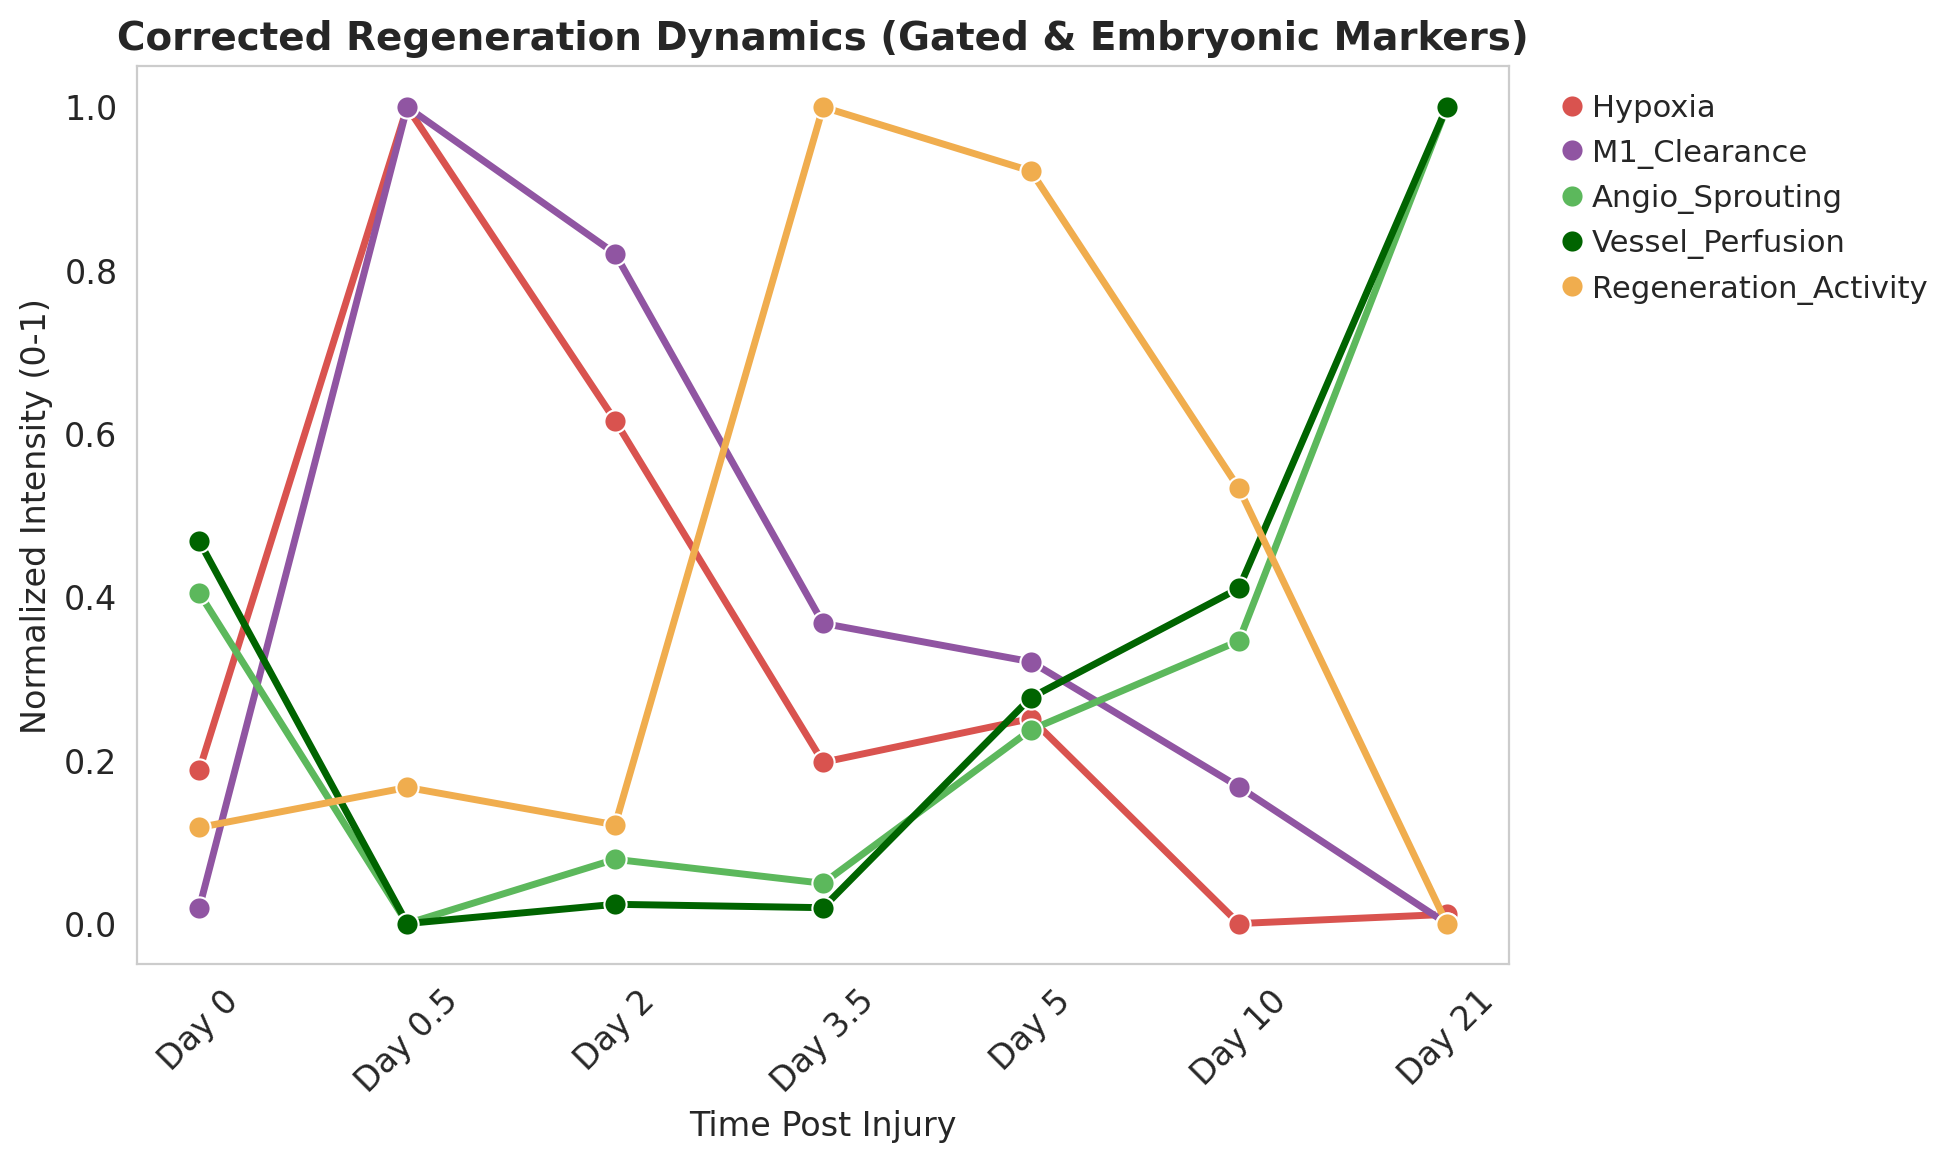

In [ ]:
# @title 🧬 Lazarus "Phoenix" Engine: 专家修正版 (The Final Fix)
# 完全采纳组员建议：引入胚胎型标志物 + 智能门控 (Lazy Masking)

import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import sparse
import os

# 1. 路径与读取
# ------------------------------------------------------------------
H5AD_PATH = '/content/drive/MyDrive/Project_Adipose_Ghost/01_Processing/GSE138826_Muscle_Clean.h5ad'
FIG_SAVE_PATH = '/content/drive/MyDrive/Project_Adipose_Ghost/02_Figures/Lazarus_Phoenix_Curve.pdf'

if not os.path.exists(H5AD_PATH):
    raise FileNotFoundError("❌ 还没读取到数据！请先跑之前的读取步骤。")

print(f"🚀 加载数据: {os.path.basename(H5AD_PATH)}")
adata = sc.read_h5ad(H5AD_PATH)

# 确保数据已标准化 (CPM + Log1p)
if np.max(adata.X) > 100:
    print("⚖️ 执行标准化与对数化...")
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)

# 2. 定义"凤凰"探测器 (Expert Refined Signatures)
# ------------------------------------------------------------------
# 严格遵循组员的基因列表，不再使用 Ttn/Ckm
refined_signatures = {
    # [红线] 缺氧 (Hypoxia)
    'Score_Hypoxia': ['Hif1a', 'Vegfa', 'Slc2a1', 'Ldha', 'Bnip3', 'Pgk1'],

    # [紫线] M1 清创 (Clearance) - 加了 Spp1
    'Score_M1_Clearance': ['Mmp9', 'Nos2', 'Il1b', 'Tnf', 'Cd68', 'Spp1'],

    # [亮绿] 血管萌发 (Sprouting)
    'Score_Angio_Sprouting': ['Angpt2', 'Kdr', 'Flt1', 'Apln', 'Esm1', 'Dll4'],

    # [深绿] 血管灌注 (Perfusion)
    'Score_Vessel_Perfusion': ['Vwf', 'Cdh5', 'Pecam1', 'Tie1'],

    # [金线] ⚡️核心修正⚡️：新生再生 (De Novo Regeneration)
    # 只看胚胎型/幼稚型基因，Day 0 必须为低！
    'Score_Regeneration_Activity': ['Myh3', 'Myh8', 'Pax7', 'Myod1', 'Myog']
}

# 3. 基础评分 (Raw Scoring)
# ------------------------------------------------------------------
print("🧮 计算基础基因评分...")
for name, genes in refined_signatures.items():
    valid = [g for g in genes if g in adata.var_names]
    if valid:
        sc.tl.score_genes(adata, gene_list=valid, score_name=name)
    else:
        adata.obs[name] = 0

# 4. 智能门控聚合 (Smart Gating & Aggregation)
# ------------------------------------------------------------------
print("🧠 启动智能门控 (Lazy Masking) - 剔除噪音细胞...")

# 获取时间点并排序
timepoints = adata.obs['Timepoint'].cat.categories
df_filtered = pd.DataFrame(index=timepoints, columns=refined_signatures.keys())

for tp in timepoints:
    # 提取当前时间点的"切片"
    subset = adata[adata.obs['Timepoint'] == tp]

    # 辅助函数：计算Marker表达强度 (处理稀疏矩阵)
    def check_expression(sub_adata, markers, threshold=0.1):
        valid_markers = [m for m in markers if m in sub_adata.var_names]
        if not valid_markers: return np.zeros(sub_adata.n_obs, dtype=bool)

        # 获取表达矩阵 (自动处理稀疏)
        expr = sub_adata[:, valid_markers].X
        if sparse.issparse(expr):
            expr = expr.sum(axis=1).A.flatten() # 转为 dense array
        else:
            expr = expr.sum(axis=1)
        return expr > threshold

    # --- A. 血管分数：只看内皮 (Pecam1/Vwf+) ---
    # 你的组员说得对：不能在T细胞里算血管分
    endo_mask = check_expression(subset, ['Pecam1', 'Vwf'])

    if endo_mask.sum() > 5: # 至少有5个血管细胞才算数
        df_filtered.loc[tp, 'Score_Angio_Sprouting'] = subset.obs.loc[endo_mask, 'Score_Angio_Sprouting'].mean()
        df_filtered.loc[tp, 'Score_Vessel_Perfusion'] = subset.obs.loc[endo_mask, 'Score_Vessel_Perfusion'].mean()
    else:
        # 如果这一天血管很少(比如Day 0.5)，只能用全局兜底，但权重会很低
        df_filtered.loc[tp, 'Score_Angio_Sprouting'] = subset.obs['Score_Angio_Sprouting'].mean()
        df_filtered.loc[tp, 'Score_Vessel_Perfusion'] = subset.obs['Score_Vessel_Perfusion'].mean()

    # --- B. 再生分数 & 缺氧：只看非免疫细胞 (CD45-) ---
    # 剔除游荡的免疫细胞，只看干活的干细胞/成肌细胞
    immune_mask = check_expression(subset, ['Ptprc']) # Ptprc = CD45
    stromal_mask = ~immune_mask # 非免疫细胞

    if stromal_mask.sum() > 5:
        df_filtered.loc[tp, 'Score_Regeneration_Activity'] = subset.obs.loc[stromal_mask, 'Score_Regeneration_Activity'].mean()
        df_filtered.loc[tp, 'Score_Hypoxia'] = subset.obs.loc[stromal_mask, 'Score_Hypoxia'].mean()
    else:
        df_filtered.loc[tp, 'Score_Regeneration_Activity'] = subset.obs['Score_Regeneration_Activity'].mean()
        df_filtered.loc[tp, 'Score_Hypoxia'] = subset.obs['Score_Hypoxia'].mean()

    # --- C. M1分数：只看免疫细胞 (CD45+) ---
    if immune_mask.sum() > 5:
        df_filtered.loc[tp, 'Score_M1_Clearance'] = subset.obs.loc[immune_mask, 'Score_M1_Clearance'].mean()
    else:
        df_filtered.loc[tp, 'Score_M1_Clearance'] = subset.obs['Score_M1_Clearance'].mean()

print("✅ 智能聚合完成。")

# 5. 归一化与绘图 (Standard Plotting)
# ------------------------------------------------------------------
df_filtered = df_filtered.astype(float)

# Min-Max 归一化
scaler = MinMaxScaler()
df_norm = pd.DataFrame(
    scaler.fit_transform(df_filtered),
    columns=df_filtered.columns,
    index=df_filtered.index
)

# 绘图
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'axes.grid': False})

colors = {
    'Score_Hypoxia': '#D9534F',          # Red
    'Score_M1_Clearance': '#9055A2',     # Purple
    'Score_Angio_Sprouting': '#5CB85C',  # Light Green
    'Score_Vessel_Perfusion': '#006400', # Dark Green
    'Score_Regeneration_Activity': '#F0AD4E' # Gold (Use new name)
}

for col in df_norm.columns:
    sns.lineplot(
        data=df_norm, x=df_norm.index, y=col,
        label=col.replace('Score_', ''),
        color=colors.get(col, 'gray'),
        marker='o', linewidth=2.5, markersize=8
    )

plt.title('Corrected Regeneration Dynamics (Gated & Embryonic Markers)', fontsize=14, fontweight='bold')
plt.ylabel('Normalized Intensity (0-1)', fontsize=12)
plt.xlabel('Time Post Injury', fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
plt.xticks(rotation=45)
plt.tight_layout()

os.makedirs(os.path.dirname(FIG_SAVE_PATH), exist_ok=True)
plt.savefig(FIG_SAVE_PATH, dpi=300)

print(f"✅ 修正版图表已保存: {FIG_SAVE_PATH}")
print("👀 预期变化：")
print("   1. 金线 (Regeneration) 在 Day 0 应该是 0 (或接近0)，Day 5 之后才起来。")
print("   2. 绿线 (Sprouting) 应该更平滑，且依然领先金线。")

🛡️ 正在从全局数据中提取巨噬细胞亚群...
computing score 'Score_Myeloid_Lineage'
    finished: added
    'Score_Myeloid_Lineage', score of gene set (adata.obs).
    99 total control genes are used. (0:00:03)
✅ 锁定目标: 27452 个髓系细胞 (占总数 51.6%)
🧮 计算 MPI 极化指数与 LAM 分数...
computing score 'Score_M1'
    finished: added
    'Score_M1', score of gene set (adata.obs).
    250 total control genes are used. (0:00:01)
computing score 'Score_M2'
    finished: added
    'Score_M2', score of gene set (adata.obs).
    249 total control genes are used. (0:00:01)
computing score 'Score_LAM'
    finished: added
    'Score_LAM', score of gene set (adata.obs).
    150 total control genes are used. (0:00:01)
computing score 'Score_Angio_Function'
    finished: added
    'Score_Angio_Function', score of gene set (adata.obs).
    149 total control genes are used. (0:00:01)
✅ 分析完成。请去 Figures 文件夹查收三张图。
👀 重点核查：
   1. MPI图：是否看到重心从 Day 2 (红) 下降到 Day 5 (蓝)？
   2. LAM图：Day 5 和 Day 10 是否有明显的波峰？


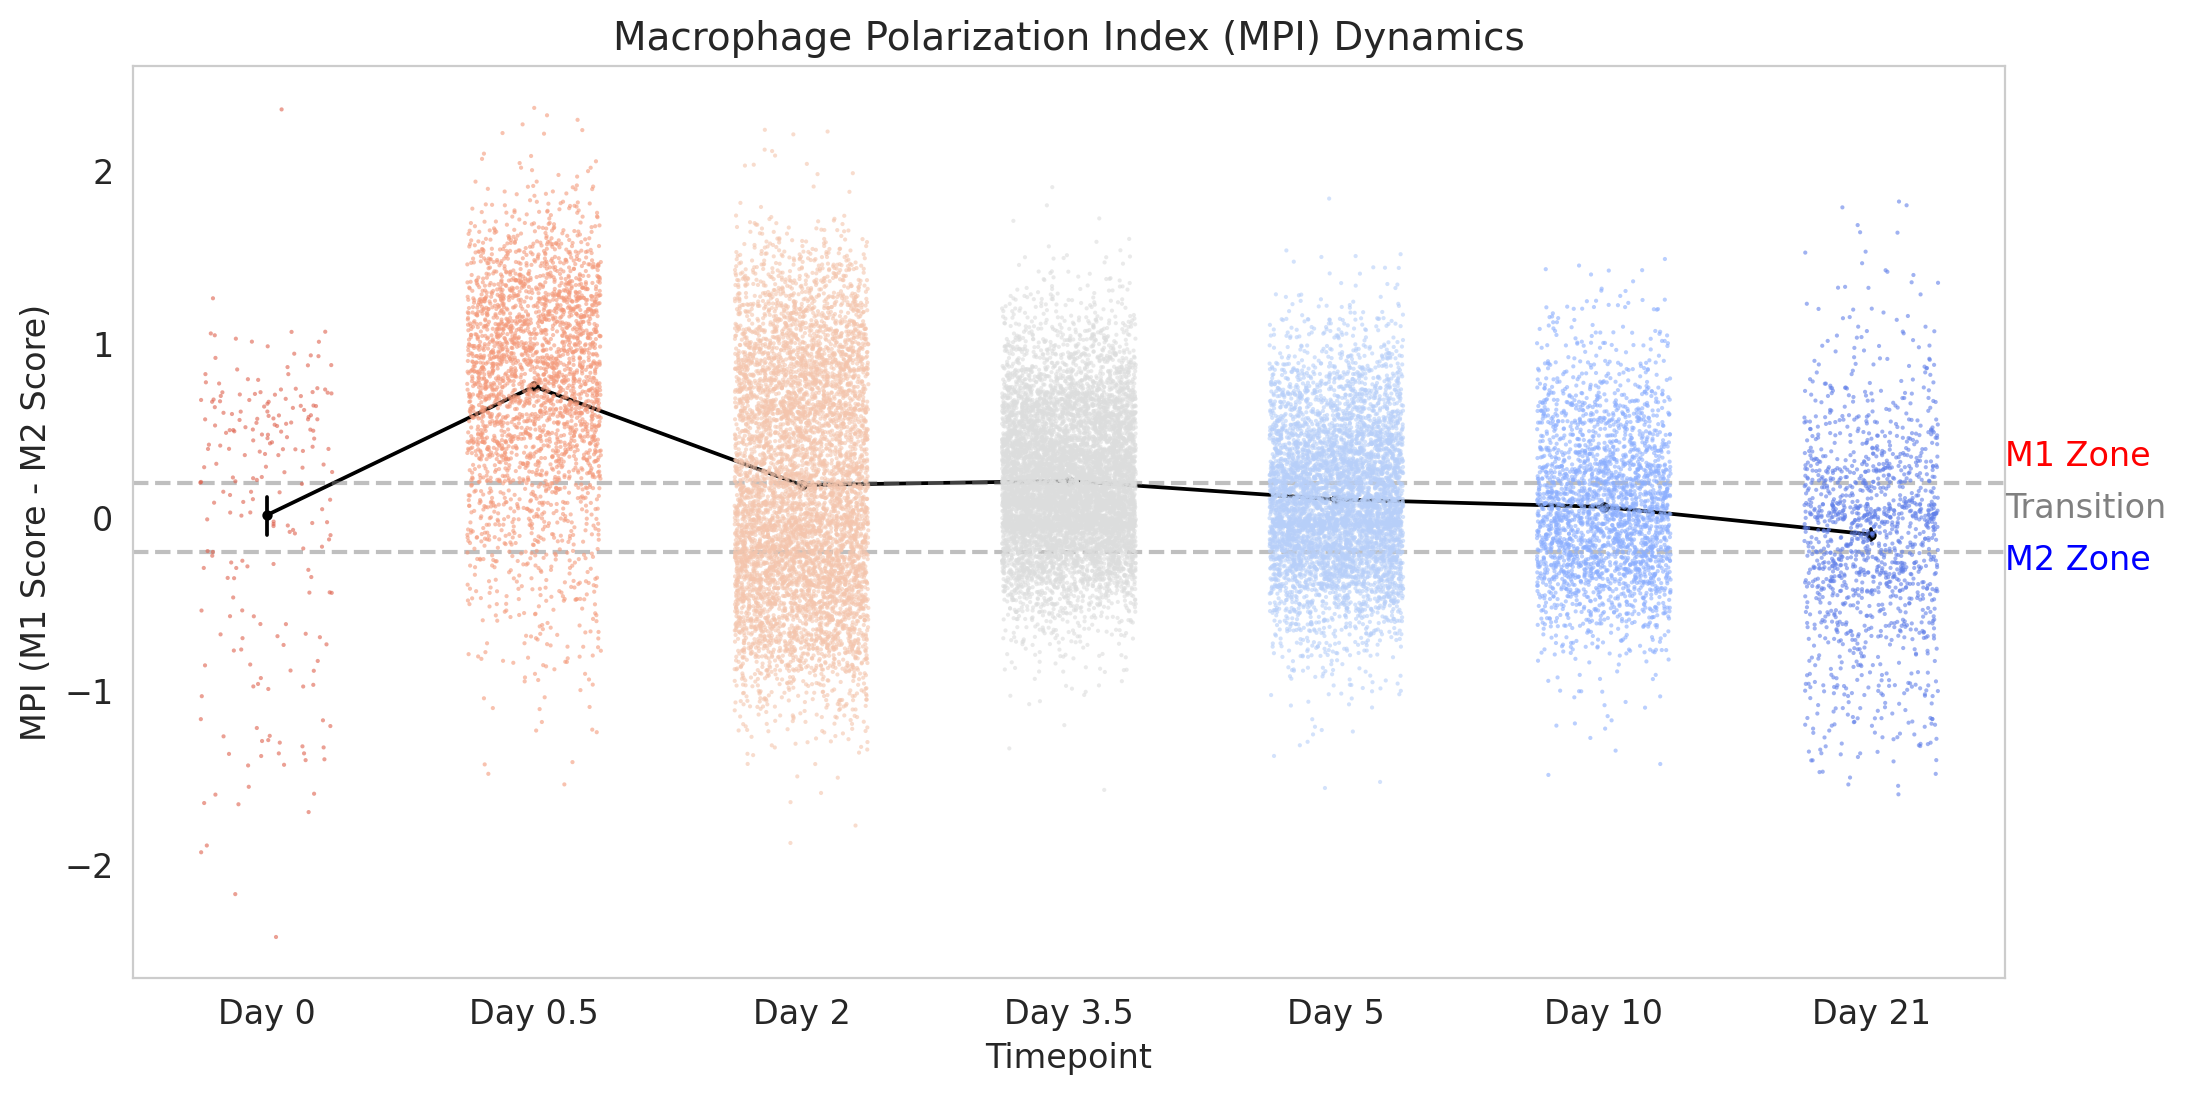

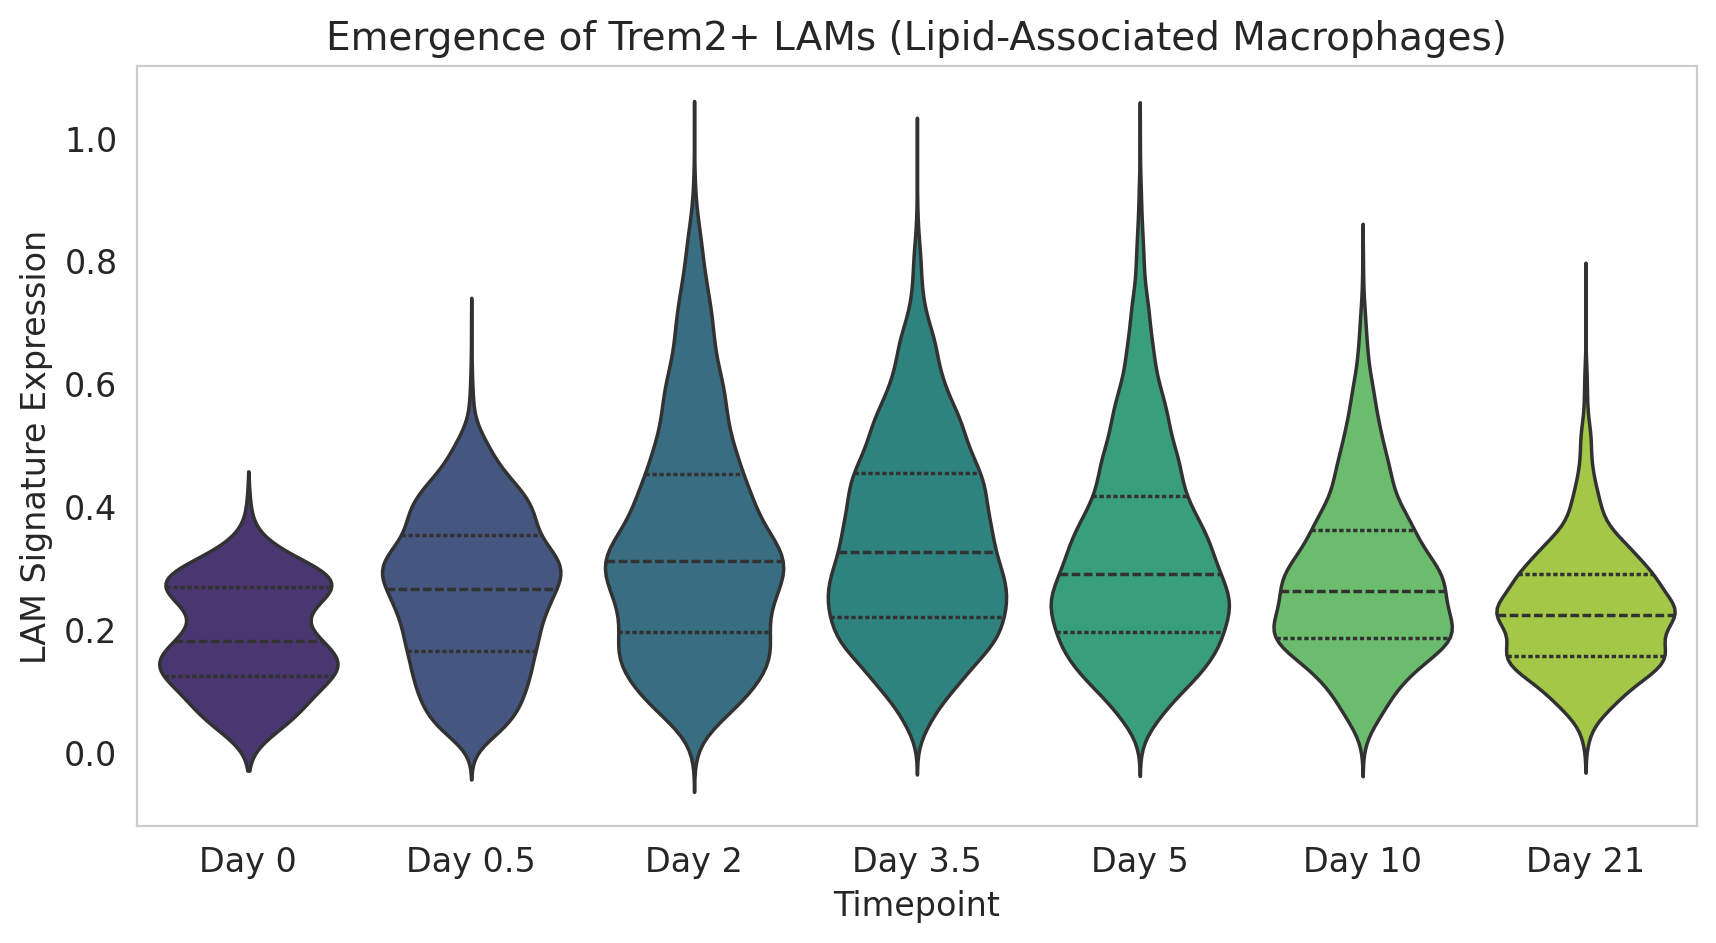

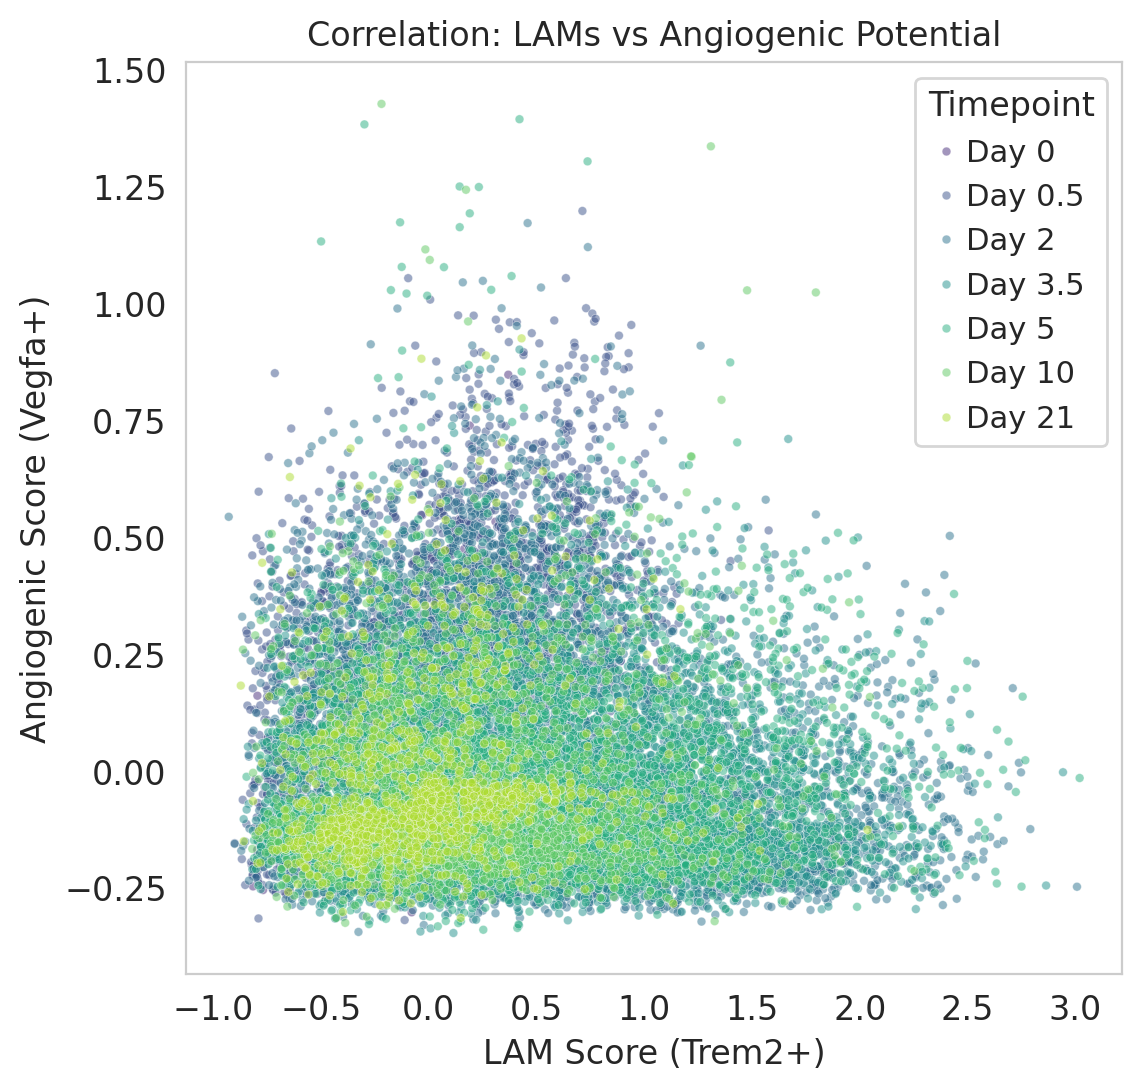

In [ ]:
# @title 🧭 巨噬细胞深潜：MPI 极化指数 & LAMs 猎捕
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 锁定巨噬细胞池 (Macrophage Pool Isolation)
# ------------------------------------------------------------------
# 我们不能在成肌细胞里算 M1/M2，必须先圈出髓系细胞
print("🛡️ 正在从全局数据中提取巨噬细胞亚群...")

# 定义广义髓系标志物 (Macrophage/Monocyte)
myeloid_genes = ['Cd68', 'Adgre1', 'Lyz2', 'Csf1r', 'Itgam'] # Adgre1=F4/80
valid_myeloid = [g for g in myeloid_genes if g in adata.var_names]

# 粗略打分并提取
sc.tl.score_genes(adata, gene_list=valid_myeloid, score_name='Score_Myeloid_Lineage')
# 阈值 0.1 是经验值，提取表达了髓系基因的细胞
macro_adata = adata[adata.obs['Score_Myeloid_Lineage'] > 0.1].copy()

print(f"✅ 锁定目标: {macro_adata.n_obs} 个髓系细胞 (占总数 {macro_adata.n_obs/adata.n_obs:.1%})")

# 2. 定义战术特征集 (Tactical Signatures)
# ------------------------------------------------------------------
signatures = {
    # [攻击] M1 Pro-inflammatory
    'Score_M1': ['Nos2', 'Il1b', 'Tnf', 'Cd86', 'Il6', 'Cxcl10'],

    # [修复] M2 Anti-inflammatory (Canonical)
    'Score_M2': ['Mrc1', 'Arg1', 'Cd163', 'Retnla', 'Il10'],

    # [第三势力] LAMs (Lipid-Associated) - 脂肪/损伤修复特种兵
    # Trem2 是核心，Lpl 是功能，Cd9 是共表达
    'Score_LAM': ['Trem2', 'Lpl', 'Cd9', 'Spp1', 'Fabp4', 'Gpnmb'],

    # [功能] 血管支持 (Angio-Supportive)
    'Score_Angio_Function': ['Vegfa', 'Pdgfb', 'Mmp9', 'Hgf']
}

# 3. 计算核心指标 (MPI Calculation)
# ------------------------------------------------------------------
print("🧮 计算 MPI 极化指数与 LAM 分数...")

for name, genes in signatures.items():
    valid = [g for g in genes if g in macro_adata.var_names]
    sc.tl.score_genes(macro_adata, gene_list=valid, score_name=name)

# ⚡️ 核心公式：MPI = M1 - M2
# 结果范围通常在 -1 到 1 之间
macro_adata.obs['MPI_Index'] = macro_adata.obs['Score_M1'] - macro_adata.obs['Score_M2']

# 4. 可视化一：MPI 动态光谱 (The MPI Spectrum)
# ------------------------------------------------------------------
# 展示细胞群像鸟群一样从 M1 飞向 M2
plt.figure(figsize=(12, 6))

# 使用 Stripplot 展示每一个细胞的极化状态
sns.stripplot(
    data=macro_adata.obs,
    x='Timepoint',
    y='MPI_Index',
    hue='Timepoint',
    palette='coolwarm_r', # 红(M1) -> 蓝(M2)
    jitter=0.25,
    size=1.5,
    alpha=0.6,
    legend=False
)

# 加上均值连线，看重心移动
sns.pointplot(
    data=macro_adata.obs, x='Timepoint', y='MPI_Index',
    color='black', scale=0.5, join=True
)

# 划出你的"灰色区域"
plt.axhline(0.2, color='gray', linestyle='--', alpha=0.5)
plt.axhline(-0.2, color='gray', linestyle='--', alpha=0.5)
plt.text(6.5, 0.3, 'M1 Zone', color='red')
plt.text(6.5, -0.3, 'M2 Zone', color='blue')
plt.text(6.5, 0, 'Transition', color='gray')

plt.title('Macrophage Polarization Index (MPI) Dynamics', fontsize=14)
plt.ylabel('MPI (M1 Score - M2 Score)')
plt.savefig('/content/drive/MyDrive/Project_Adipose_Ghost/02_Figures/Macro_MPI_Spectrum.pdf')

# 5. 可视化二：LAMs 特种兵的崛起 (The Rise of LAMs)
# ------------------------------------------------------------------
# 我们要证明 LAMs 确实出现在"复苏期" (Day 5-10)
plt.figure(figsize=(10, 5))

# 归一化 LAM 分数以便展示
from sklearn.preprocessing import MinMaxScaler
macro_adata.obs['Score_LAM_Norm'] = MinMaxScaler().fit_transform(macro_adata.obs[['Score_LAM']])

sns.violinplot(
    data=macro_adata.obs,
    x='Timepoint',
    y='Score_LAM_Norm',
    palette='viridis',
    inner='quartile'
)

plt.title('Emergence of Trem2+ LAMs (Lipid-Associated Macrophages)', fontsize=14)
plt.ylabel('LAM Signature Expression')
plt.savefig('/content/drive/MyDrive/Project_Adipose_Ghost/02_Figures/Macro_LAM_Violin.pdf')

# 6. 可视化三：功能关联验证 (Function Correlation)
# ------------------------------------------------------------------
# 验证：是不是 LAMs 在分泌 VEGF？
# 我们看 LAM 分数和 血管支持分数 的相关性
plt.figure(figsize=(6, 6))
sns.scatterplot(
    data=macro_adata.obs,
    x='Score_LAM',
    y='Score_Angio_Function',
    hue='Timepoint',
    palette='viridis',
    s=10,
    alpha=0.5
)
plt.title('Correlation: LAMs vs Angiogenic Potential', fontsize=12)
plt.xlabel('LAM Score (Trem2+)')
plt.ylabel('Angiogenic Score (Vegfa+)')
plt.savefig('/content/drive/MyDrive/Project_Adipose_Ghost/02_Figures/Macro_Function_Corr.pdf')

print("✅ 分析完成。请去 Figures 文件夹查收三张图。")
print("👀 重点核查：")
print("   1. MPI图：是否看到重心从 Day 2 (红) 下降到 Day 5 (蓝)？")
print("   2. LAM图：Day 5 和 Day 10 是否有明显的波峰？")

🧠 启动智能计算 (Split & Purify)...
computing score 'Score_Hypoxia'
    finished: added
    'Score_Hypoxia', score of gene set (adata.obs).
    200 total control genes are used. (0:00:12)
computing score 'Score_M1_Clearance'
    finished: added
    'Score_M1_Clearance', score of gene set (adata.obs).
    200 total control genes are used. (0:00:03)
computing score 'Score_Angio_Sprouting'
    finished: added
    'Score_Angio_Sprouting', score of gene set (adata.obs).
    200 total control genes are used. (0:00:03)
computing score 'Score_Stem_Proliferation'
    finished: added
    'Score_Stem_Proliferation', score of gene set (adata.obs).
    200 total control genes are used. (0:00:03)
computing score 'Score_DeNovo_Differentiation'
    finished: added
    'Score_DeNovo_Differentiation', score of gene set (adata.obs).
    200 total control genes are used. (0:00:02)
✅ 修正图已保存: /content/drive/MyDrive/Project_Adipose_Ghost/02_Figures/Lazarus_Diamond_Split.pdf
👀 预期结果: 蓝线(干细胞)在 Day 3.5 达峰，金线(分化)在 Day 5

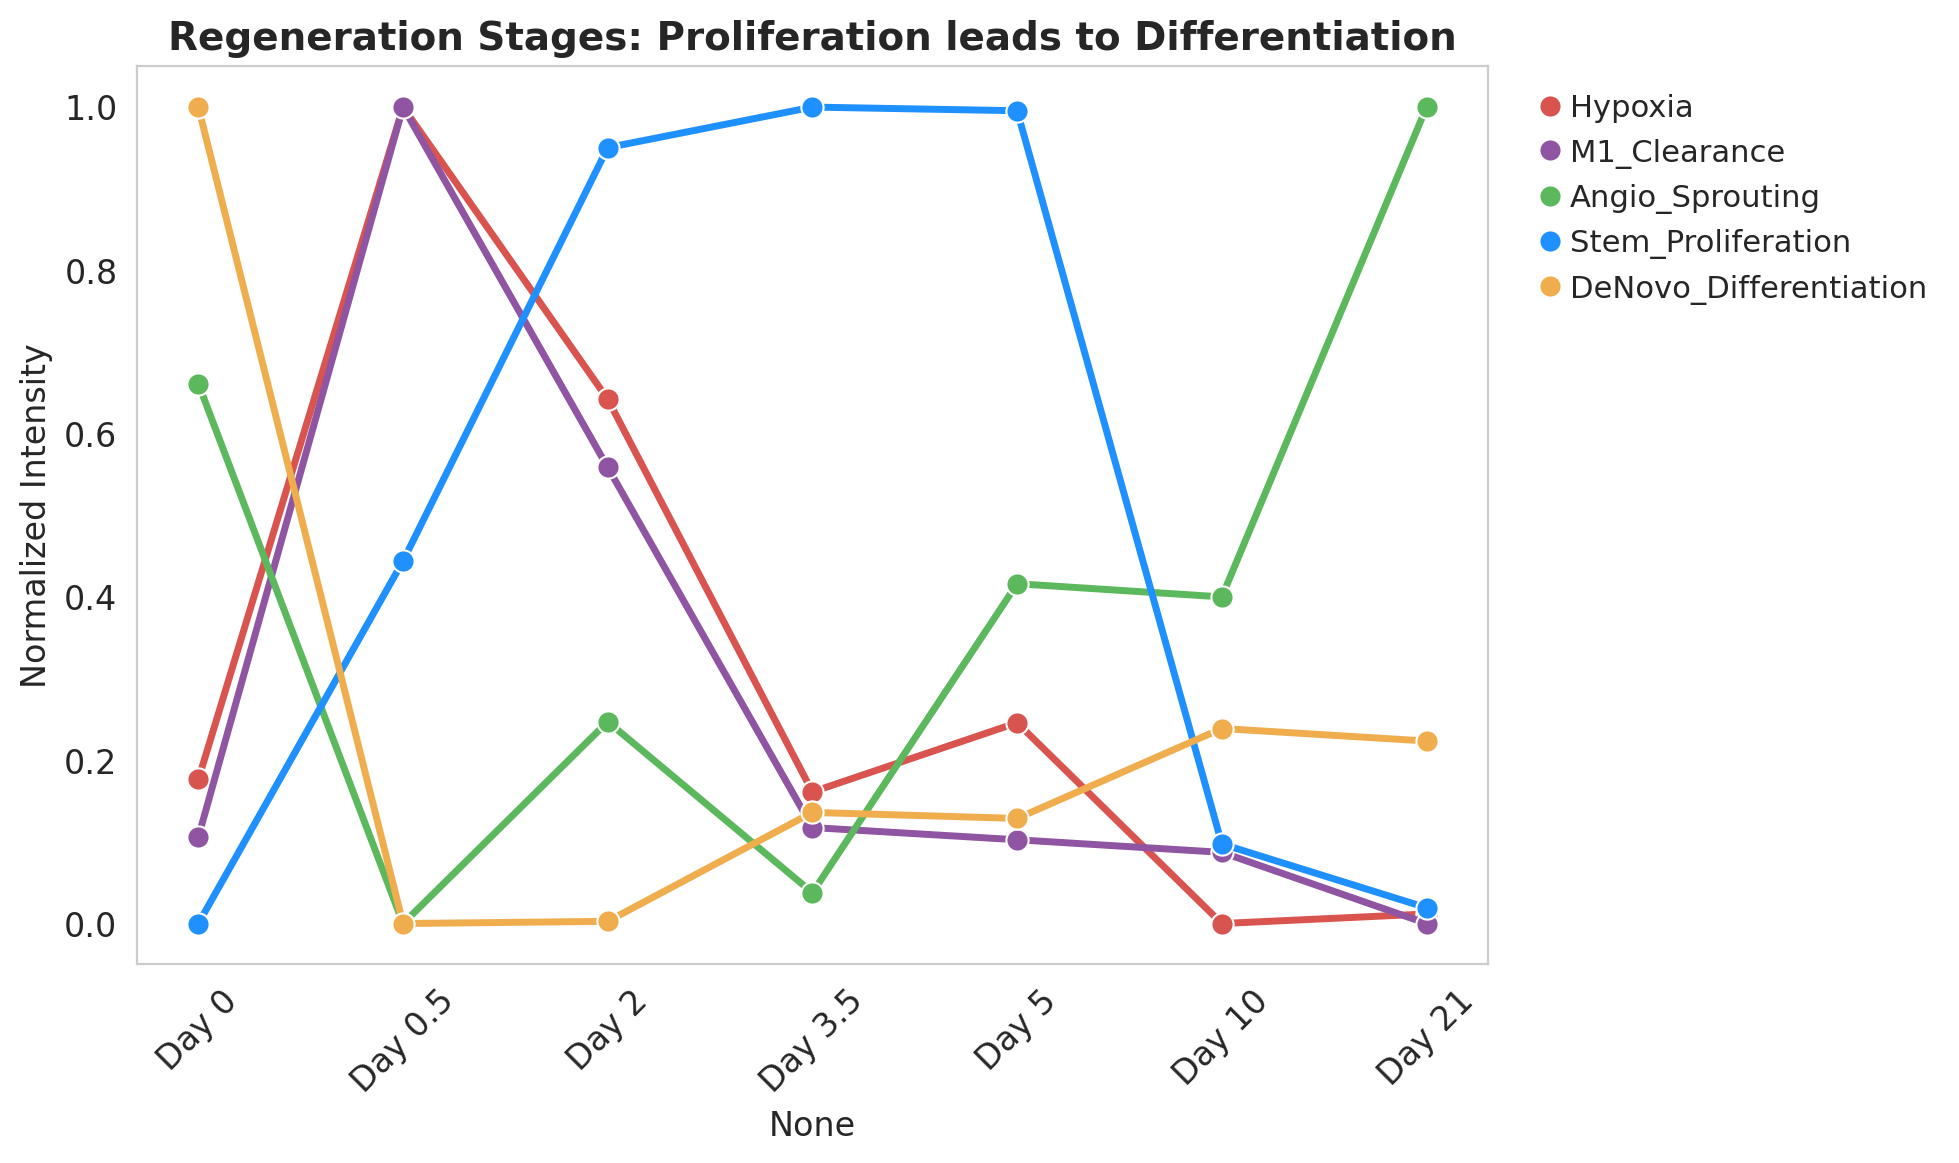

In [ ]:
# @title 🧬 Lazarus "Diamond" Engine: 基因提纯与时序拆解
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import sparse
import os

# 1. 读取清洗后的数据
H5AD_PATH = '/content/drive/MyDrive/Project_Adipose_Ghost/01_Processing/GSE138826_Muscle_Clean.h5ad'
FIG_SAVE_PATH = '/content/drive/MyDrive/Project_Adipose_Ghost/02_Figures/Lazarus_Diamond_Split.pdf'

if not os.path.exists(H5AD_PATH):
    raise FileNotFoundError("❌ 数据未找到！请先运行之前的读取步骤。")

adata = sc.read_h5ad(H5AD_PATH)
if np.max(adata.X) > 100:
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)

# 2. 定义"提纯"后的基因集 (Purified Signatures)
# ------------------------------------------------------------------
final_signatures = {
    # [红线] 缺氧 (Hypoxia) - 维持原判
    'Score_Hypoxia': ['Hif1a', 'Vegfa', 'Slc2a1', 'Ldha', 'Bnip3'],

    # [紫线] M1 清创 (Clearance)
    'Score_M1_Clearance': ['Mmp9', 'Nos2', 'Il1b', 'Tnf'],

    # [亮绿] 血管萌发 (Sprouting) - ⚡️剔除背景基因⚡️
    # 只保留 Esm1 (尖端细胞), Apln, Angpt2。剔除 Kdr/Flt1 (静息内皮也有)
    'Score_Angio_Sprouting': ['Esm1', 'Apln', 'Angpt2', 'Dll4'],

    # [蓝线] 干细胞扩增 (Stem Cell Amplification) - ⚡️新拆分⚡️
    # 这是"备料"阶段，预期 Day 3.5 高
    'Score_Stem_Proliferation': ['Pax7', 'Mki67', 'Top2a', 'Pcna'],

    # [金线] 实质性再生 (De Novo Differentiation) - ⚡️真正的结果⚡️
    # 只有分化出了肌管，才算再生。Day 0 必须低！
    'Score_DeNovo_Differentiation': ['Myh3', 'Myh8', 'Myog', 'Ckm']
}

# 3. 智能计算与过滤 (Smart Calculation)
# ------------------------------------------------------------------
print("🧠 启动智能计算 (Split & Purify)...")

# 计算所有分数
for name, genes in final_signatures.items():
    valid = [g for g in genes if g in adata.var_names]
    if valid:
        sc.tl.score_genes(adata, gene_list=valid, score_name=name)
    else:
        adata.obs[name] = 0

# 准备绘图数据
timepoints = adata.obs['Timepoint'].cat.categories
df_filtered = pd.DataFrame(index=timepoints, columns=final_signatures.keys())

for tp in timepoints:
    subset = adata[adata.obs['Timepoint'] == tp]

    # 辅助函数
    def check_expr(sub, markers):
        valid = [m for m in markers if m in sub.var_names]
        if not valid: return np.zeros(sub.n_obs, dtype=bool)
        expr = sub[:, valid].X
        if sparse.issparse(expr): expr = expr.sum(axis=1).A.flatten()
        else: expr = expr.sum(axis=1)
        return expr > 0.1

    # --- A. 纯净血管分 ---
    # 只看内皮细胞 (Pecam1+)，且必须有萌发信号
    endo_mask = check_expr(subset, ['Pecam1', 'Vwf'])
    if endo_mask.sum() > 5:
        df_filtered.loc[tp, 'Score_Angio_Sprouting'] = subset.obs.loc[endo_mask, 'Score_Angio_Sprouting'].mean()
    else:
        df_filtered.loc[tp, 'Score_Angio_Sprouting'] = subset.obs['Score_Angio_Sprouting'].mean()

    # --- B. 纯净再生分 (干细胞 & 分化) ---
    # 剔除免疫细胞 (CD45-)
    stromal_mask = ~check_expr(subset, ['Ptprc'])
    if stromal_mask.sum() > 5:
        df_filtered.loc[tp, 'Score_Stem_Proliferation'] = subset.obs.loc[stromal_mask, 'Score_Stem_Proliferation'].mean()
        df_filtered.loc[tp, 'Score_DeNovo_Differentiation'] = subset.obs.loc[stromal_mask, 'Score_DeNovo_Differentiation'].mean()
        df_filtered.loc[tp, 'Score_Hypoxia'] = subset.obs.loc[stromal_mask, 'Score_Hypoxia'].mean()
    else:
        df_filtered.loc[tp, 'Score_Stem_Proliferation'] = subset.obs['Score_Stem_Proliferation'].mean()
        df_filtered.loc[tp, 'Score_DeNovo_Differentiation'] = subset.obs['Score_DeNovo_Differentiation'].mean()
        df_filtered.loc[tp, 'Score_Hypoxia'] = subset.obs['Score_Hypoxia'].mean()

    # --- C. M1 ---
    immune_mask = check_expr(subset, ['Ptprc'])
    if immune_mask.sum() > 5:
        df_filtered.loc[tp, 'Score_M1_Clearance'] = subset.obs.loc[immune_mask, 'Score_M1_Clearance'].mean()
    else:
        df_filtered.loc[tp, 'Score_M1_Clearance'] = subset.obs['Score_M1_Clearance'].mean()

# 4. 绘图 (Standard Plotting)
# ------------------------------------------------------------------
df_filtered = df_filtered.astype(float)
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_filtered), columns=df_filtered.columns, index=df_filtered.index)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'axes.grid': False})

colors = {
    'Score_Hypoxia': '#D9534F',
    'Score_M1_Clearance': '#9055A2',
    'Score_Angio_Sprouting': '#5CB85C',
    'Score_Stem_Proliferation': '#1E90FF', # Blue (New!)
    'Score_DeNovo_Differentiation': '#F0AD4E' # Gold (Real!)
}

for col in df_norm.columns:
    sns.lineplot(data=df_norm, x=df_norm.index, y=col,
                 label=col.replace('Score_', ''), color=colors.get(col, 'gray'),
                 marker='o', linewidth=2.5, markersize=8)

plt.title('Regeneration Stages: Proliferation leads to Differentiation', fontsize=14, fontweight='bold')
plt.ylabel('Normalized Intensity', fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
plt.xticks(rotation=45)
plt.tight_layout()

os.makedirs(os.path.dirname(FIG_SAVE_PATH), exist_ok=True)
plt.savefig(FIG_SAVE_PATH, dpi=300)
print(f"✅ 修正图已保存: {FIG_SAVE_PATH}")
print("👀 预期结果: 蓝线(干细胞)在 Day 3.5 达峰，金线(分化)在 Day 5 才起来。绿线(血管)依然领先金线。")

computing score 'Score_Myeloid_Lineage'
    finished: added
    'Score_Myeloid_Lineage', score of gene set (adata.obs).
    100 total control genes are used. (0:00:09)
computing score 'Score_Repair_Macrophage'
    finished: added
    'Score_Repair_Macrophage', score of gene set (adata.obs).
    199 total control genes are used. (0:00:02)
✅ 修复版巨噬细胞分析完成。
👀 预期结果: 波峰应该出现在 Day 3.5 - Day 5，与血管生成和干细胞分化同步。


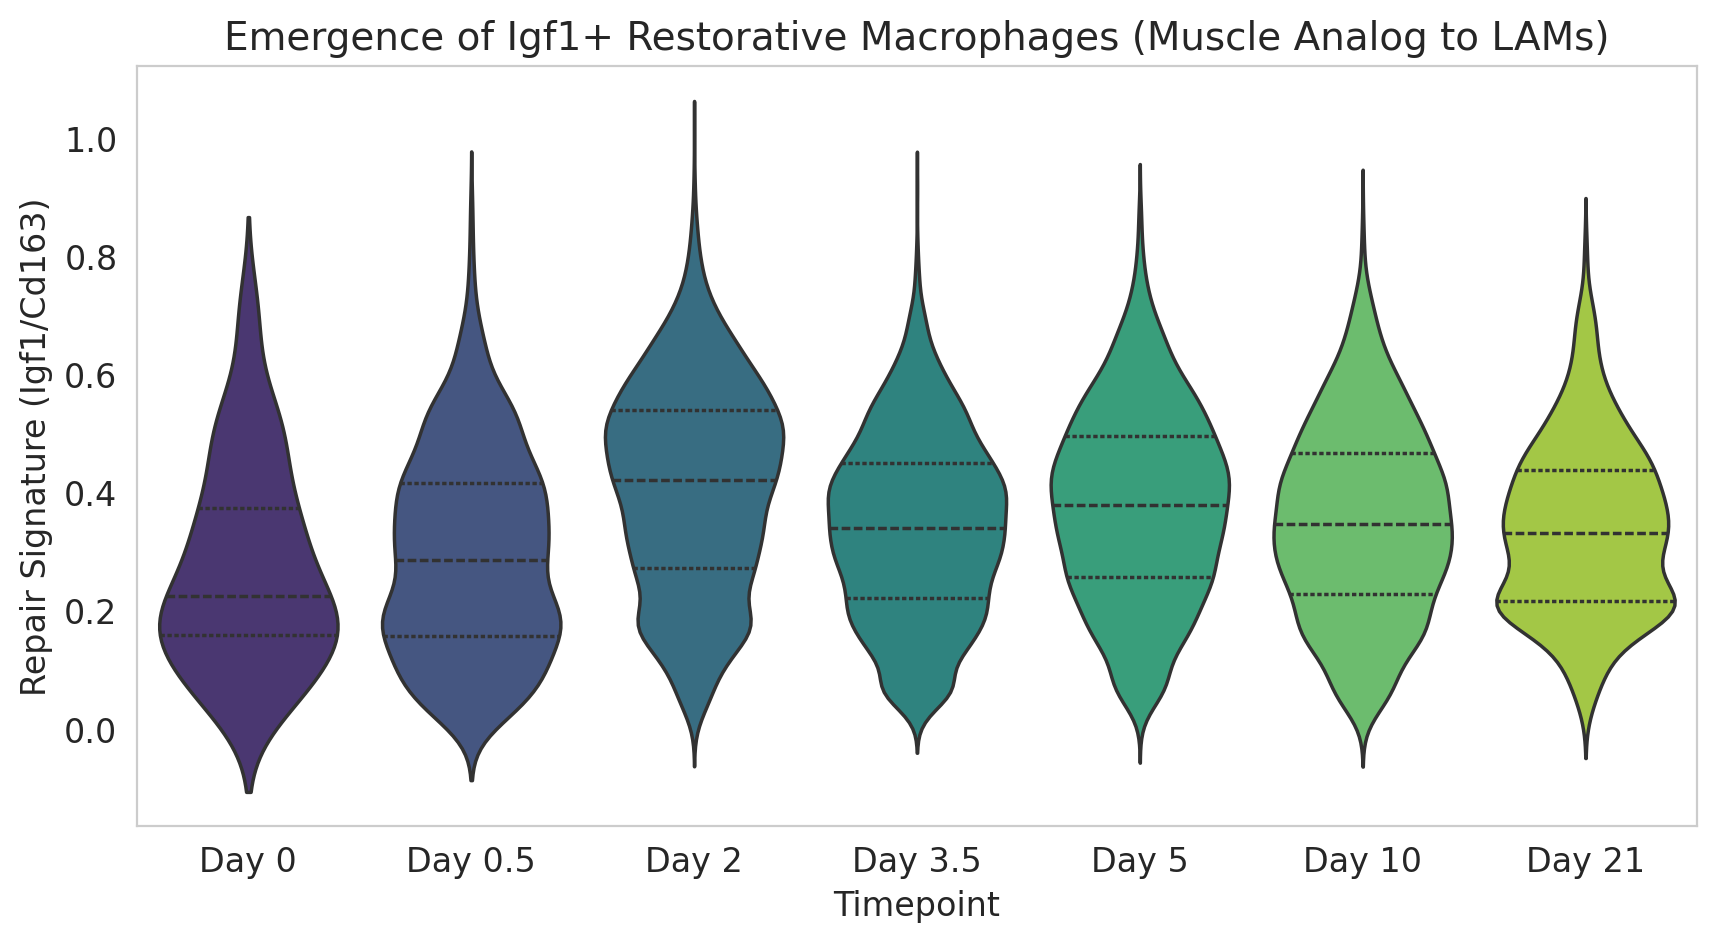

In [ ]:
# @title 🧭 修正版：肌肉修复型巨噬细胞 (Igf1/Cd163)
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 提取巨噬细胞 (沿用之前的逻辑)
myeloid_genes = ['Cd68', 'Adgre1']
sc.tl.score_genes(adata, gene_list=myeloid_genes, score_name='Score_Myeloid_Lineage')
macro_adata = adata[adata.obs['Score_Myeloid_Lineage'] > 0.1].copy()

# 2. 定义肌肉特异性的修复标志物 (Muscle-Specific Repair)
# 替换掉了之前的 Trem2/Lpl
repair_signature = ['Cd163', 'Igf1', 'Gdf3', 'Spp1', 'Mrc1']

sc.tl.score_genes(macro_adata, gene_list=repair_signature, score_name='Score_Repair_Macrophage')

# 3. 绘图：验证修复型巨噬细胞的出现时间
plt.figure(figsize=(10, 5))

# 归一化方便展示
from sklearn.preprocessing import MinMaxScaler
macro_adata.obs['Score_Repair_Norm'] = MinMaxScaler().fit_transform(macro_adata.obs[['Score_Repair_Macrophage']])

sns.violinplot(
    data=macro_adata.obs,
    x='Timepoint',
    y='Score_Repair_Norm',
    palette='viridis',
    inner='quartile',
    order=['Day 0', 'Day 0.5', 'Day 2', 'Day 3.5', 'Day 5', 'Day 10', 'Day 21']
)

plt.title('Emergence of Igf1+ Restorative Macrophages (Muscle Analog to LAMs)', fontsize=14)
plt.ylabel('Repair Signature (Igf1/Cd163)')
plt.savefig('/content/drive/MyDrive/Project_Adipose_Ghost/02_Figures/Macro_Repair_Violin.pdf')

print("✅ 修复版巨噬细胞分析完成。")
print("👀 预期结果: 波峰应该出现在 Day 3.5 - Day 5，与血管生成和干细胞分化同步。")